In [1]:
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
## TASK 1 ##
# Examine the data, 
# there may be some anomalies in the data, and you will have to clean the data before you move forward to other tasks. 
# Explain what you did to clean the data.

df = pd.read_csv('AB_NYC_2019.csv') # data frame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Text(0.5, 1.0, 'Number of Airbnb Listings for Neighbourhood Groups')

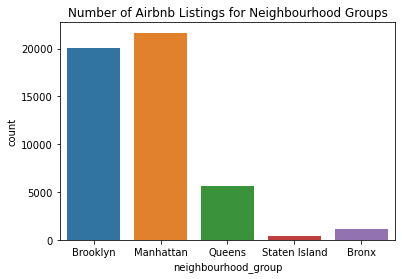

In [3]:
sns.countplot(x='neighbourhood_group', data=df).set_title("Number of Airbnb Listings for Neighbourhood Groups")

In [4]:
# checking if there are duplicate ids
df.duplicated(subset=['id']).sum() # no duplicate ids

0

In [5]:
df.shape # rows, columns

(48895, 16)

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
# examine df columns with dtype object
df.room_type.unique() # looks clean

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [9]:
df.neighbourhood_group.unique() # looks clean

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
nbh = df.neighbourhood.unique()
nbh.sort()
print(nbh) # looks clean

['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Gardens'
 'Castle Hill' 'Castleton Corners' 'Chelsea' 'Chinatown' 'City Island'
 'Civic Center' 'Claremont Village' 'Clason Point' 'Clifton'
 'Clinton Hill' 'Co-op City' 'Cobble Hill' 'College Point' 'Columbia St'
 'Concord' 'Concourse' 'Concourse Village' 'Coney Island' 'Corona'
 'Crown Heights' 'Cypress Hills' 'DUMBO' 'Ditmars Steinway' 'Dongan Hills'
 'Douglaston' 'Downtown Brooklyn' 'Dyker Heights' 'East Elmhurst'
 'East Flatbush' 'East Harlem' 'East Morrisania' 'East New York'
 'East Village' 'Eastchester' 'Edenwald' 'Edgemere' 'Elmh

In [11]:
df.last_review.unique() # NaN is acceptable for dtype object

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [12]:
# check NaN for other variables
df.isnull().sum()
# reviews_per_month is dtype float64, should not have NaN
# for other variables NaN is acceptable for dtype object

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
# check reviews_per_month is NaN and check it's number_of_reviews
df.loc[df.reviews_per_month.isnull(), ['reviews_per_month', 'number_of_reviews']]

,reviews_per_month,number_of_reviews
2,NaN,0
19,NaN,0
26,NaN,0
36,NaN,0
38,NaN,0
...,...,...
48890,NaN,0
48891,NaN,0
48892,NaN,0
48893,NaN,0


In [14]:
# if number of reviews = 0 then reviews_per_month should = 0
# reviews_per_month is dtype float64
df.loc[df.number_of_reviews == 0, ['reviews_per_month']] = 0
df.loc[df.number_of_reviews == 0, ['reviews_per_month', 'number_of_reviews']]

,reviews_per_month,number_of_reviews
2,0.0,0
19,0.0,0
26,0.0,0
36,0.0,0
38,0.0,0
...,...,...
48890,0.0,0
48891,0.0,0
48892,0.0,0
48893,0.0,0


In [15]:
# examine df columns with dtype int or float (number)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
# price should not be 0 (shown by min)
len(df[df.price == 0])
# 11 values, not a lot of data points so we can remove them 
# if we were to not remove them, we would use the mean to estimate the costs - however I prefer not to because price heavily depends on the features of the room

11

In [17]:
# indexes where price == 0
indexes = df[df.price == 0].index
# delete these row indexes from data frame
df.drop(indexes , inplace=True)
len(df[df.price == 0])

0

In [18]:
# availibility_365 shouldn't be 0 but is acceptable
# when it is 0 it could indicate that the room is not available for booking, but the owner did not want to remove the listing
# so the listing is still valid

Text(0.5, 1.0, 'Airbnb Prices')

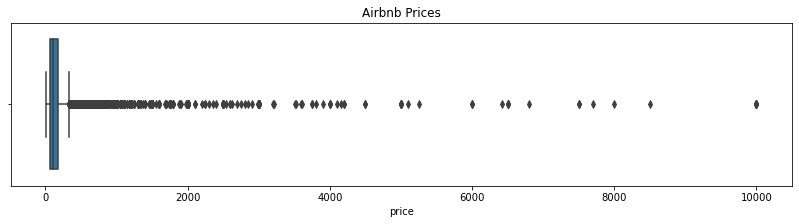

In [19]:
# check if there are any outliers 
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['price']).set_title("Airbnb Prices")
# large range of price is expected

In [20]:
df[df.price > 8000]
# have "luxury" in name, none are "shared" room_type, high price expected

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365


Text(0.5, 1.0, 'Airbnb Minimum Nights')

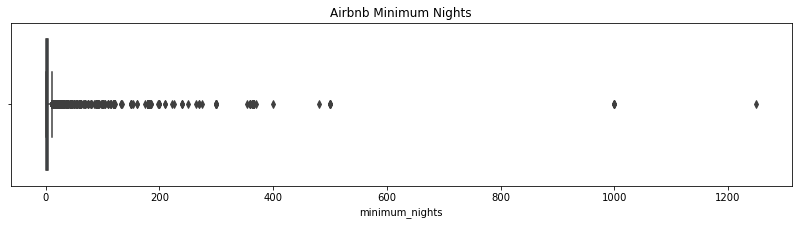

In [21]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['minimum_nights']).set_title("Airbnb Minimum Nights")
# minumum nights for the rental

In [22]:
df[df.minimum_nights > 800] # not many airbnbs have long rental periods, expected

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,0.00,1,365


Text(0.5, 1.0, 'Airbnb Reviews Per Month')

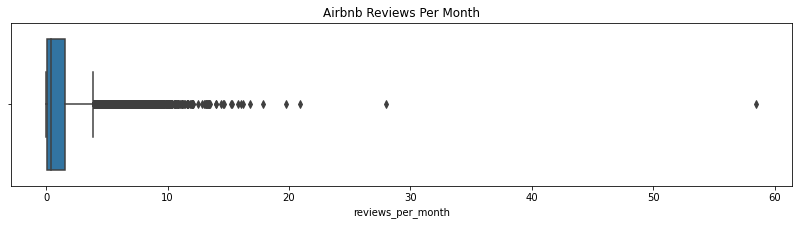

In [23]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['reviews_per_month']).set_title("Airbnb Reviews Per Month")

In [24]:
df[df.reviews_per_month > 50] # makes sense because minimum_nights is a low number and is in Manhattan Theater District

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [25]:
## TASK 2 ##
# Examine how the prices of the Airbnb changes with the change in the neighborhood.
# a. Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood 
# (select only neighborhoods with more than 5 listings).
# b. Analyze, the price variation between different neighborhood group, and plot these trends.

df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [26]:
# select neighborhoods with more than 5 listings
df_n = df.copy()
df_n.groupby('neighbourhood').filter(lambda x : len(x)>5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [27]:
# a. Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood for each neighborhood_group
# criteria to find top 5 and bottom 5 = median
# using median as a criteria because the data is skewed and has some outliers
df_n.skew()
# check skewness of price
# positive skewness, asymmetry in the distribution, larger towards the right hand side of the distribution

id                                -0.090153
host_id                            1.206172
latitude                           0.236910
longitude                          1.284585
price                             19.119027
minimum_nights                    21.826797
number_of_reviews                  3.691201
reviews_per_month                  3.301601
calculated_host_listings_count     7.932253
availability_365                   0.763454
dtype: float64

In [28]:
df_n.groupby(by=["neighbourhood_group", "neighbourhood"]).price.median()

neighbourhood_group  neighbourhood
Bronx                Allerton          66.5
                     Baychester        75.0
                     Belmont           52.5
                     Bronxdale         50.0
                     Castle Hill       39.0
                                      ...  
Staten Island        Tottenville      100.0
                     West Brighton     69.5
                     Westerleigh       71.5
                     Willowbrook      249.0
                     Woodrow          700.0
Name: price, Length: 221, dtype: float64

In [29]:
# top 5
df_n.groupby(by=["neighbourhood_group", "neighbourhood"]).price.median().groupby(by=["neighbourhood_group"], group_keys=False).nlargest()

neighbourhood_group  neighbourhood     
Bronx                Riverdale             150.0
                     West Farms            122.0
                     Spuyten Duyvil         99.5
                     City Island            97.5
                     Unionport              90.0
Brooklyn             DUMBO                 189.0
                     Vinegar Hill          175.0
                     Mill Basin            167.5
                     Cobble Hill           156.0
                     Boerum Hill           150.0
Manhattan            Tribeca               295.0
                     NoHo                  250.0
                     Flatiron District     225.0
                     Midtown               210.0
                     Financial District    200.0
Queens               Neponsit              274.0
                     Breezy Point          195.0
                     Belle Harbor          155.0
                     Bay Terrace           141.5
                     Jamaica 

In [30]:
# bottom 5
df_n.groupby(by=["neighbourhood_group", "neighbourhood"]).price.median().groupby(by=["neighbourhood_group"], group_keys=False).nsmallest()

neighbourhood_group  neighbourhood     
Bronx                Castle Hill           39.0
                     Hunts Point           40.0
                     Tremont               41.0
                     Mount Eden            45.5
                     Soundview             49.0
Brooklyn             Borough Park          53.5
                     Brownsville           62.0
                     Bushwick              65.0
                     Sheepshead Bay        65.0
                     Cypress Hills         68.0
Manhattan            Washington Heights    72.0
                     Marble Hill           76.5
                     Inwood                77.5
                     Roosevelt Island      80.0
                     Harlem                89.0
Queens               Corona                40.0
                     Whitestone            49.0
                     Little Neck           50.0
                     Woodhaven             52.0
                     Elmhurst              59.0


Text(0.5, 1.0, 'Airbnb Prices')

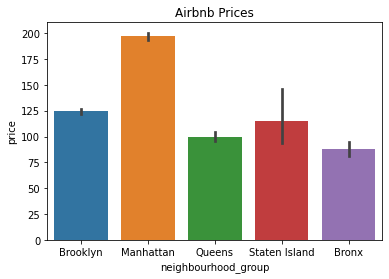

In [31]:
# b. Analyze, the price variation between different neighborhood group, and plot these trends.
sns.barplot(x="neighbourhood_group", y="price", data=df_n).set_title("Airbnb Prices")
# A bar plot represents an estimate of central tendency for a numeric variable 
# with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars

Text(0.5, 1.0, 'Airbnb Mean of Prices')

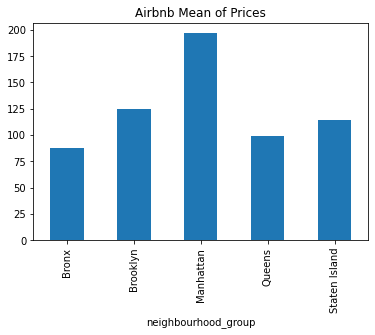

In [32]:
df_n.groupby(by=["neighbourhood_group"]).price.mean().plot.bar().set_title("Airbnb Mean of Prices")
# Manhattan has largest mean prices
# Manhattan seems more expensive than other groups

Text(0.5, 1.0, 'Airbnb Median of Prices')

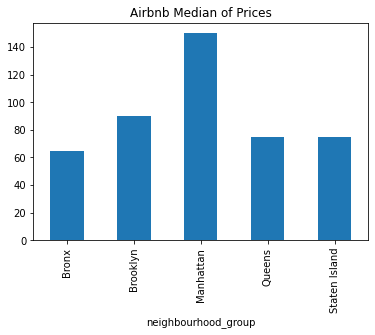

In [33]:
df_n.groupby(by=["neighbourhood_group"]).price.median().plot.bar().set_title("Airbnb Median of Prices")
# Manhattan has largest median prices
# Queens and Staten Island have almost the same median

Text(0.5, 1.0, 'Airbnb Standard Deviation of Prices')

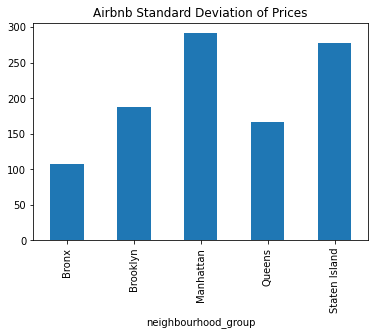

In [34]:
# variation difference
df_n.groupby(by=["neighbourhood_group"]).price.std().plot.bar().set_title("Airbnb Standard Deviation of Prices")
# Manhattan and Staten Island have the largest standard deviation, more variation
# Bronx has the least variation
# there can be large standard deviation in Staten Island as it is a suburban type area - more land for bigger houses

In [35]:
# Manhattan has a lot of luxury buildings and skyscrapers and there are wealthy neighborhoods within

Text(0.5, 1.0, 'Airbnb Heatmap')

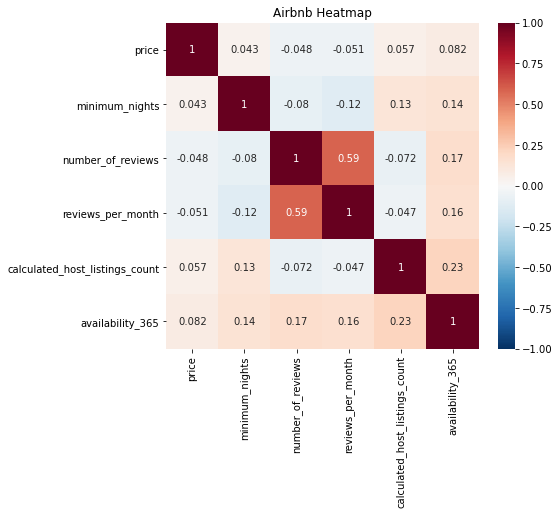

In [36]:
## TASK 3 ##
# Select a set of the most interesting features. Do a pairwise Pearson correlation analysis on all pairs
# of these variables. Show the result with a heat map and find out most positive and negative correlations.

# interesting features: neighbourhood_group, neighbourhood, room_type, 
# price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

df_c = df.copy()
df_c = df_c.drop(columns=['name', 'id', 'host_id', 'host_name', 'latitude', 'longitude'])
# the values above were dropped because id numbers and name do not really matter, id names are generated
# names are not easily quantifiable
# latitude and longitude do not matter much because geographic location is given by neighbourhood and neighbourhood_group, 
# which is more descriptive
correlation = df_c.corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r").set_title("Airbnb Heatmap")

Text(0.5, 1.0, 'Number of Airbnb Listings for Neighbourhood Groups')

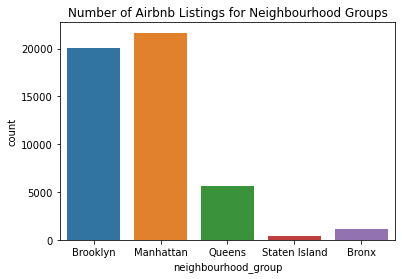

In [37]:
sns.countplot(x='neighbourhood_group', data=df).set_title("Number of Airbnb Listings for Neighbourhood Groups")

Text(0.5, 1.0, 'Airbnb Room Types')

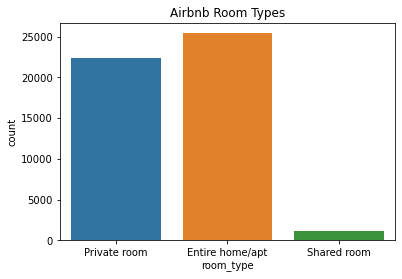

In [38]:
sns.countplot(x='room_type', data=df).set_title("Airbnb Room Types")

Text(0.5, 1.0, 'Airbnb Heatmap')

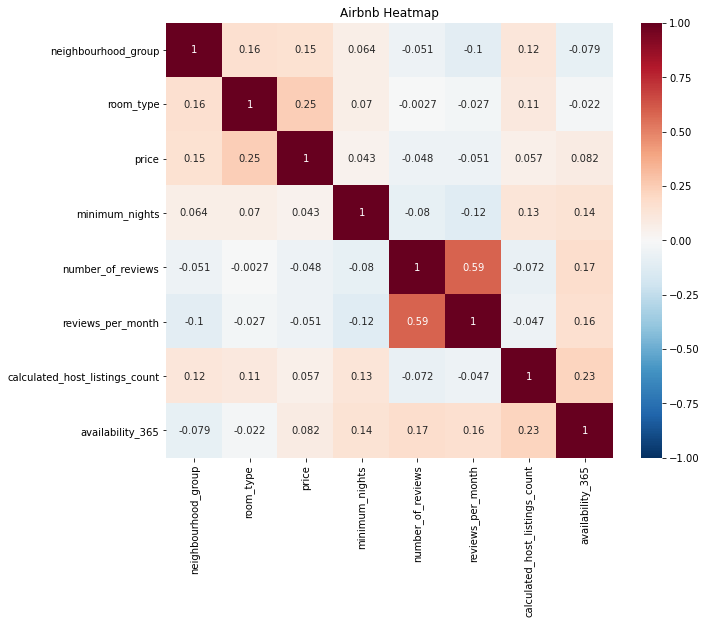

In [39]:
# map values to numbers
# ordering based on most frequent to least frequent
df_c['neighbourhood_group'] = df_c['neighbourhood_group'].map({'Brooklyn':3, 'Manhattan':4, 'Queens':2, 'Staten Island':0, 'Bronx':1})
df_c['room_type'] = df_c['room_type'].map({'Private room':1, 'Entire home/apt':2, 'Shared room':0})

correlation = df_c.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r").set_title("Airbnb Heatmap")

In [40]:
# the pair of interesting features are:
# 1. neighbourhood_group, room_type = 0.16
# 2. neighbourhood_group, price = 0.15
# 3. neighbourhood_group, reviews_per_month = -0.1
# 4. neighbourhood_group, calculated_host_listings_count = 0.12
# 5. room_type, price = 0.25
# 6. room_type, calculated_host_listings_count = 0.11
# 7. minimum_nights, reviews_per_month = -0.12
# 8. minimum_nights, calculated_host_listings_count = 0.13
# 9. minimum_nights, availability_365 = 0.14
# 10. number_of_reviews, reviews_per_month = 0.59
# 11. number_of_reviews, availability_365 = 0.17
# 12. reviews_per_month, availability_365 = 0.16
# 13. calculated_host_listings_count, availability_365 = 0.23

# these pairs are interesting because they have a correlation value less than -0.1 or greater than 0.1
# 0.1 was chosen because this is a large data set
# 0.1 does not show a very strong correlation

# thoughts about the interesting features:
# 1. perhaps neighborhoods have similar houses built within, so there would be similar types of rooms. 
# also, perhaps wealthier neighborhoods have luxury houses with similar room types
# 2. perhaps wealthier neighborhoods have more expensive houses which would mean higher rental price. 
# also, perhaps neighborhoods with more attractions near it deems it more valuable, which would increase price
# 3. negative correlation is interesting
# 4. perhaps there are more housing in neighborhoods or neighborhoods are more popular than others like for tourists, which could mean more housing listings
# 5. perhaps rooms with more space or less shared space are more expensive
# 6. perhaps certain room types are more popular, like ones with kitchens or more space
# 7. perhaps less required nights to stay means more different people are renting the space which would lead to more reviews
# 8. perhaps more required nights are more popular for hosts to list multiple listings because they are looking for more revnue
# 9. perhaps more reqired nights mean more availability for the year, less people are filling up the spots frequently because requires more commitment
# 10. to be expected, more reviews has more possibility for more reviews per month
# 11. postive correlation is interesitng
# 12. postive correlation is interesitng, similar to 11
# 13. perhaps hosts with multiple listings have more rooms that are more availible throughout the year

In [41]:
## TASK 4 ##
# The Latitude and Longitude of all the Airbnb listings are provided in the dataset.
# a. Plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, 
# and the points are color coded based on the neighborhood group feature.
# b. Now again, plot a scatter plot based on these coordinates, where the points represent the
# location of an Airbnb, and the points are color coded based on the price of the particular Airbnb,
# where price of the listing is less than 1000. Looking at the graph can you tell which
# neighborhood group is the most expensive.

Text(0.5, 1.0, 'Airbnb Locations')

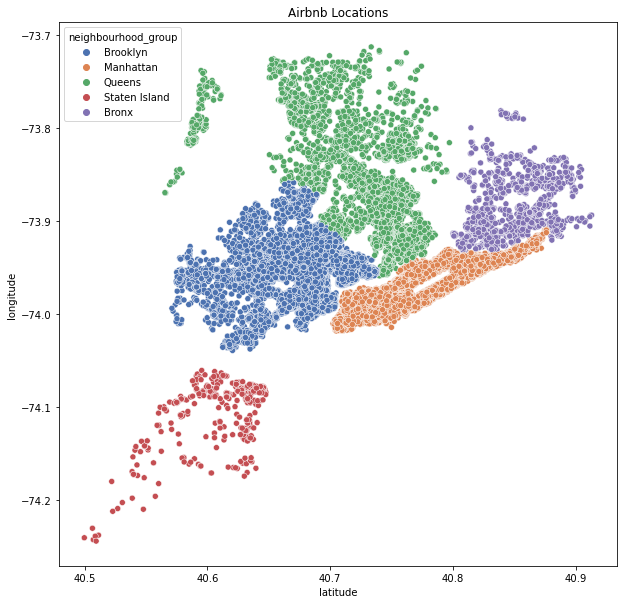

In [42]:
# a. Plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, 
# and the points are color coded based on the neighborhood group feature.
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="latitude", y="longitude", hue="neighbourhood_group", palette="deep").set_title("Airbnb Locations")

Text(0.5, 1.0, 'Airbnb Prices based on Location')

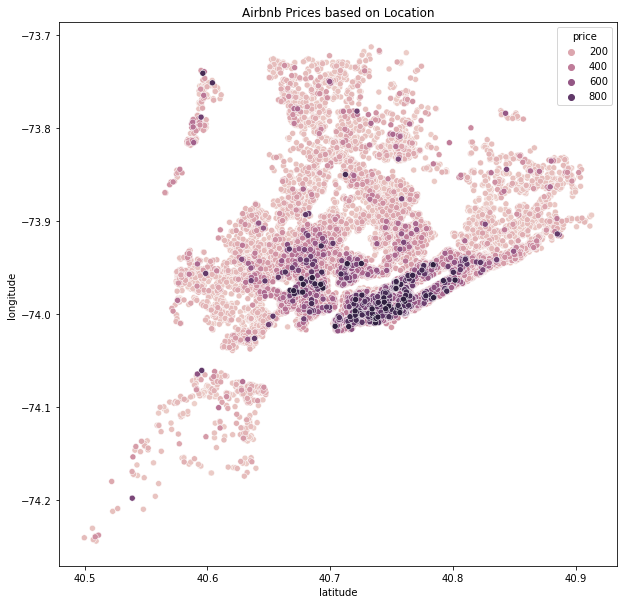

In [43]:
# b. Now again, plot a scatter plot based on these coordinates, where the points represent the
# location of an Airbnb, and the points are color coded based on the price of the particular Airbnb,
# where price of the listing is less than 1000. Looking at the graph can you tell which
# neighborhood group is the most expensive.

df_m = df[df['price'] < 1000].sort_values(by="price")
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_m, x="latitude", y="longitude", hue="price").set_title("Airbnb Prices based on Location")
# area in Manhattan and near it is expensive

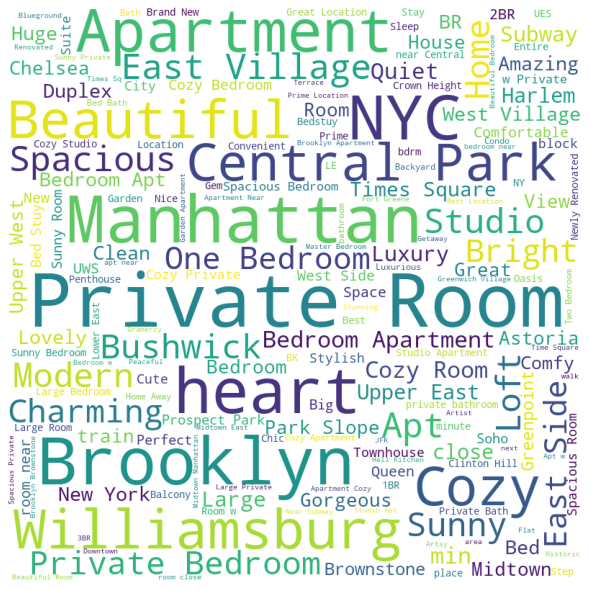

In [44]:
## TASK 5 ##
# Word clouds are useful tool to explore the text data. Extract the words from the name of the Airbnb
# and generate a word cloud.

names = df.dropna(subset=['name']).name.to_list()
names = ",".join(names)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(names)

# plot the WordCloud image                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Private Room shows up frequently, probably because that phrase is popular amongst customers, something that is sought out for
# There are also frequent location words such as: NYC, Brooklyn, Central Park, Williamsburg, Manhattan
# which are places that are also sought out for because of its asthetic, building types, and neighborhood culture
# Williamsburg, Manhattan and Central Park are wealthy and pretty neighborhoods
# There are also some frequent adjectives: Sunny, heart, Cozy, Spaciious which are also sought out for 
# these adjectives relate to what is popular or what is deemed valuable traits for rooms/housing 

In [45]:
## TASK 6 ##
# Find out which areas has the busiest (hosts with high number of listings) host? Are there any
# reasons, why these hosts are the busiest, considers factors such as availability, price, review, etc.?
# Bolster you reasoning with different plots and correlations.

# host that are busiest based on the neighbourhood groups
df.groupby(by=["neighbourhood_group", "host_id", "host_name"]).calculated_host_listings_count.count().groupby(by=["neighbourhood_group"], group_keys=False).nlargest()

# busiest hosts:
# Bronx = Vie (310670)
# Brooklyn = Vida (7503643)
# Manhattan = Sonder (219517861)
# Queens = Kazuya (137358866)
# Staten Island = Amarjit S (104812805)

neighbourhood_group  host_id    host_name          
Bronx                310670     Vie                     13
                     23878336   Armando                 10
                     30509656   Orit                     8
                     35783912   Pi & Leo                 8
                     295128     Carol Gloria             7
Brooklyn             7503643    Vida                    52
                     26377263   Stat                    35
                     119669058  Melissa                 34
                     417504     The Box House Hotel     28
                     226410657  Nina                    27
Manhattan            219517861  Sonder (NYC)           327
                     107434423  Blueground             230
                     30283594   Kara                   121
                     12243051   Sonder                  96
                     16098958   Jeremy & Laura          96
Queens               137358866  Kazuya                  79
    

In [46]:
vie = df[df.host_id == 310670]
vida = df[df.host_id == 7503643]
sonder = df[df.host_id == 219517861]
# Kazuya has listings in other neighbourhood_group, don't include listings in other neighbourhood_group
kazuya = df.loc[(df.host_id == 137358866) & (df.neighbourhood_group == 'Queens')]
amarjit = df[df.host_id == 104812805]

# vertical_stack
df_hosts = pd.concat([vie, vida, sonder, kazuya, amarjit], axis=0)
df_hosts.loc[(df.host_id == 137358866), ['calculated_host_listings_count']] = len(kazuya) # fix calculated_host_listings_count

df_hosts # 479 data points

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
3050,1798500,DOMINIQUE'S NY*Wanderlust room/Metro/Bronx Zoo...,310670,Vie,Bronx,Co-op City,40.86317,-73.82494,Private room,75,2,32,2019-01-01,0.46,13,363
5612,4082062,Unique room w/2 Twin beds..wifi*metro* quiet*safe,310670,Vie,Bronx,Eastchester,40.88060,-73.83433,Private room,75,2,37,2019-06-16,0.73,13,364
5625,4093399,DOMINIQUE'S NY*chic* quiet room*wifi*metro,310670,Vie,Bronx,Eastchester,40.88009,-73.83442,Private room,68,2,41,2019-01-01,0.74,13,365
6927,4963237,"DOMINIQUE'S NYC cosy,2 bedrm crashPad*Stay h...",310670,Vie,Bronx,Eastchester,40.87829,-73.83471,Entire home/apt,155,2,11,2019-05-19,0.29,13,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31457,24476209,Inexpensive Private Room with NYC / SIUH Acces...,104812805,Amarjit S,Staten Island,Arrochar,40.59761,-74.08347,Private room,33,4,6,2019-03-26,0.41,8,285
31554,24573377,Inexpensive Private Room with NYC / SIUH Acces...,104812805,Amarjit S,Staten Island,Arrochar,40.59757,-74.08434,Private room,35,4,11,2019-06-10,0.77,8,338
31872,24868754,Inexpensive Private Rm w/ NYC/SIUH/RUMC Access 3,104812805,Amarjit S,Staten Island,Arrochar,40.59679,-74.08444,Private room,33,4,17,2019-07-06,1.20,8,316
32140,25127198,Travellers delight #3,104812805,Amarjit S,Staten Island,Arrochar,40.59644,-74.08279,Private room,32,4,10,2019-05-01,0.73,8,340


Text(0.5, 1.0, 'Number of Airbnb Listings from the Busiest Hosts')

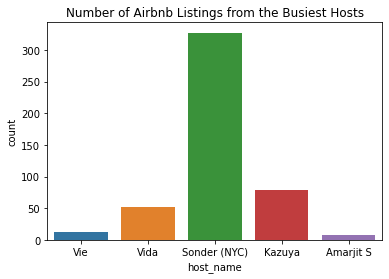

In [47]:
sns.countplot(x='host_name', data=df_hosts).set_title("Number of Airbnb Listings from the Busiest Hosts")

Text(0.5, 1.0, 'Airbnb Busiest Hosts Heatmap')

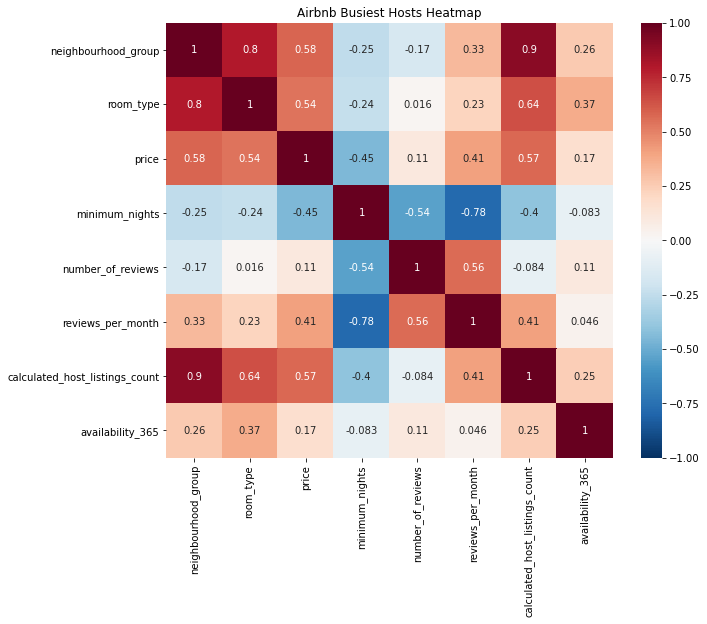

In [48]:
# reasons why these hosts are the busiest
# availability, price, review

# map values to numbers
df_hosts_c = df_hosts.copy()
df_hosts_c = df_hosts_c.drop(columns=['name', 'id', 'host_id', 'host_name', 'latitude', 'longitude'])

df_hosts_c['neighbourhood_group'] = df_hosts_c['neighbourhood_group'].map({'Brooklyn':3, 'Manhattan':4, 'Queens':2, 'Staten Island':0, 'Bronx':1})
df_hosts_c['room_type'] = df_hosts_c['room_type'].map({'Private room':1, 'Entire home/apt':2, 'Shared room':0})

correlation_hosts = df_hosts_c.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hosts, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r").set_title("Airbnb Busiest Hosts Heatmap")

# interesting correlations from busiest hosts:
# 1. calculated_host_listings_count, neighbourhood_group = 0.9
# 2. calculated_host_listings_count, room_type = 0.64
# 3. calculated_host_listings_count, price = 0.57
# 4. calculated_host_listings_count, minimum_nights = -0.4
# 5. calculated_host_listings_count, number_of_reviews = -0.084
# 6. calculated_host_listings_count, reviews_per_month = 0.41
# 7. calculated_host_listings_count, availability_365 = 0.25

# 1. very strong correlation, neghborhood groups with more listings have greater number of host's listings
# 2. strong correlation, room types that are not shared have greater number of host's listings
# 3. strong correlation, host with higher priced rooms have more listings
# 4. negative correlation, host with lower minimum_night requirements have more listings
# 5. weak correlation, average number of reviews do not really impact amount of listings
# 6. strong correlation, host with more reviews_per_month have more listings
# 7. postivie correlation, host with more availability have more listings

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Availabilites')

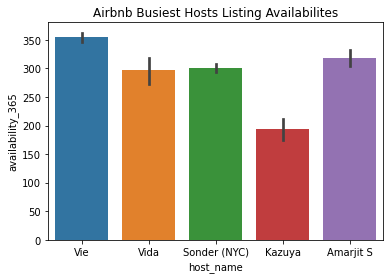

In [49]:
sns.barplot(x="host_name", y="availability_365", data=df_hosts).set_title("Airbnb Busiest Hosts Listing Availabilites")
# each host has avg. high availability for their listings

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Availabilities')

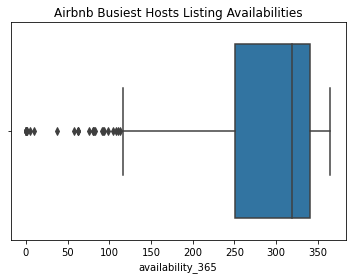

In [50]:
sns.boxplot(x=df_hosts['availability_365']).set_title("Airbnb Busiest Hosts Listing Availabilities")
# availability skewed towards the right

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Prices')

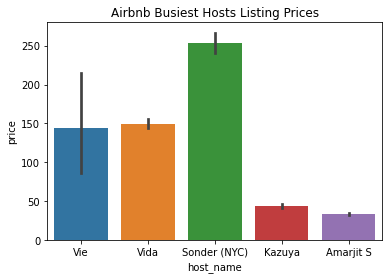

In [51]:
sns.barplot(x="host_name", y="price", data=df_hosts).set_title("Airbnb Busiest Hosts Listing Prices")
# prices range depending on host/neighborhood group
# Manhattan is the most expensive

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Prices')

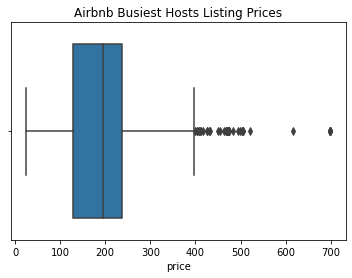

In [52]:
sns.boxplot(x=df_hosts['price']).set_title("Airbnb Busiest Hosts Listing Prices")
# prices range from (0-400] then outliers greater than 400

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Prices')

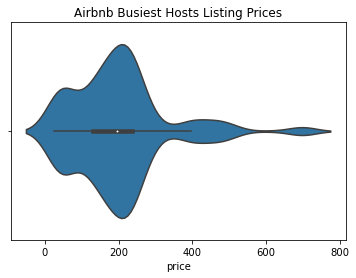

In [53]:
sns.violinplot(x=df_hosts['price']).set_title("Airbnb Busiest Hosts Listing Prices")
# many listings in the 200 price range
# also many listings from 100 to 200
# greater number of affordable listings than expensive ones

Text(0.5, 1.0, 'Airbnb Busiest Hosts Reviews per Month')

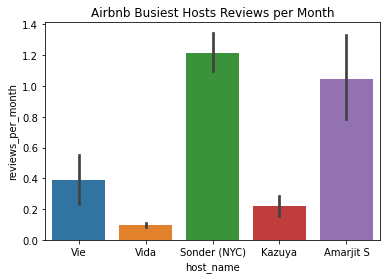

In [54]:
sns.barplot(x="host_name", y="reviews_per_month", data=df_hosts).set_title("Airbnb Busiest Hosts Reviews per Month")

Text(0.5, 1.0, 'Airbnb Busiest Hosts Reviews per Month')

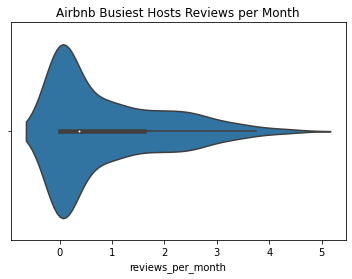

In [55]:
sns.violinplot(x=df_hosts['reviews_per_month']).set_title("Airbnb Busiest Hosts Reviews per Month")
# many reviews per month in the 0-1 range
# busy host's average listings have at least 1 review in a while

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Minimum Nights')

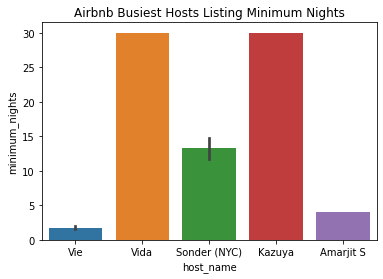

In [56]:
sns.barplot(x="host_name", y="minimum_nights", data=df_hosts).set_title("Airbnb Busiest Hosts Listing Minimum Nights")

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Minimum Nights')

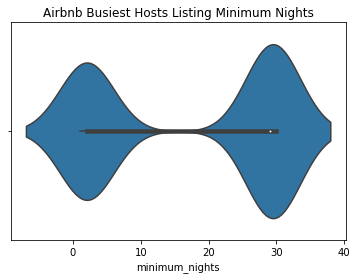

In [57]:
sns.violinplot(x=df_hosts['minimum_nights']).set_title("Airbnb Busiest Hosts Listing Minimum Nights")
# many in 0-10 or 20-40 range

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Minimum Nights')

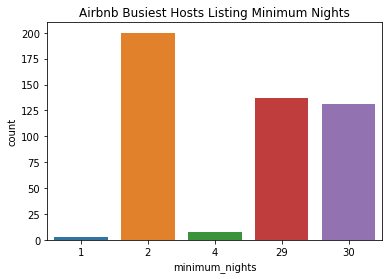

In [58]:
sns.countplot(x='minimum_nights', data=df_hosts).set_title("Airbnb Busiest Hosts Listing Minimum Nights")
# 2, 29, 30 are popular
# either low or high

Text(0.5, 1.0, 'Airbnb Busiest Hosts Listing Room Types')

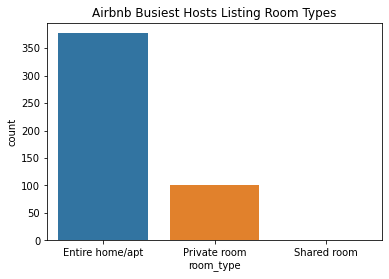

In [59]:
sns.countplot(x='room_type', data=df_hosts).set_title("Airbnb Busiest Hosts Listing Room Types")
# many listings from the busiest hosts are entire home/apt

In [60]:
## TASK 7 ##
# Create two plots (at least one unique plot not used above) of your own using the dataset that you think reveals something very interesting. 
# Explain what it is, and anything else you learned.

Text(0.5, 1.0, 'Airbnb Locations')

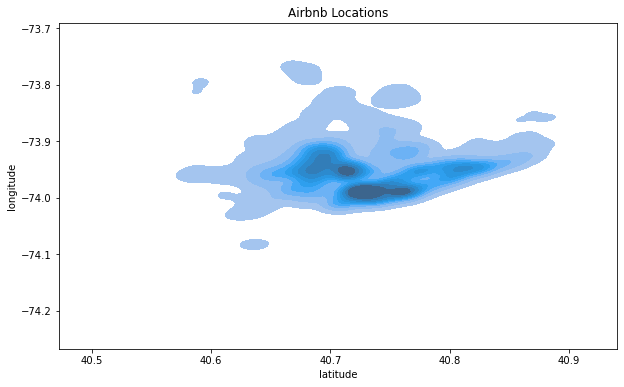

In [61]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="latitude", y="longitude", fill=True).set_title("Airbnb Locations")
# there are many listings in Manhattan and Brooklyn, seen by the darker colors on the plot
# especially the area where Brooklyn and Manhattan are next to each other
# this can be because Brooklyn is cheaper than Manhattan but people would like to be near the city due to attractions
# this can also be caused with having a denser population in both Brooklyn and Manhattan compared to the other neighborhoods

# there are a lot of city life and skyscrapers in Manhattan in the dense area shown, that is where the Empire State Building is
# lower Manhattan area

# there also is less density in the middle of Manhattan, which can be caused by Central Park being located there
# there is not many housing in Central Park

Text(0.5, 1.0, 'Airbnb Locations')

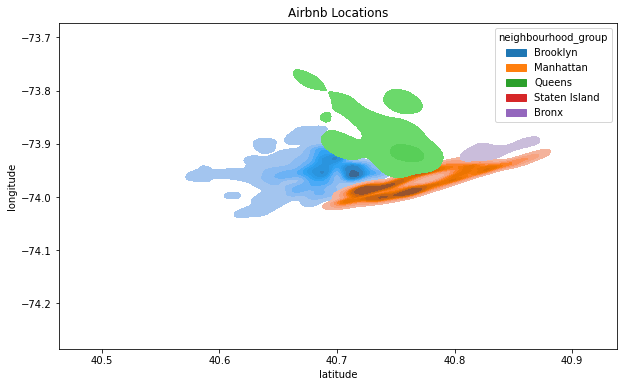

In [62]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="latitude", y="longitude", hue="neighbourhood_group", fill=True).set_title("Airbnb Locations")
# same as figure above but showing each neighborhood group in a seperate color

Text(0.5, 1.0, 'Airbnb Locations of Entire home/apt Listings')

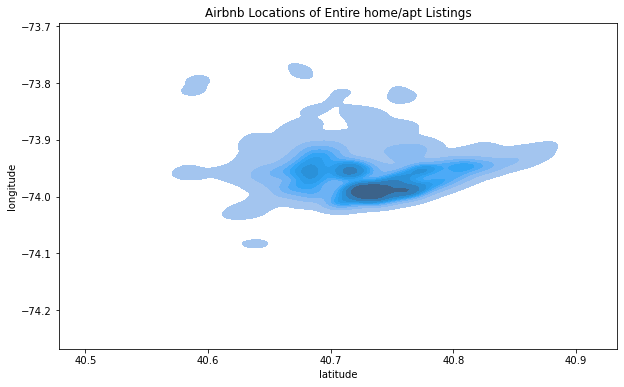

In [63]:
room1 = df[df.room_type == 'Entire home/apt']
room2 = df[df.room_type == 'Private room']
room3 = df[df.room_type == 'Shared room']

# different neighborhood groups/areas can have similar buildings within its neighborhood
# this can tell us about the types of building in the area which also can show insights about the type of architecture
# also this can tell us about the types of living
# Manhattan has many apartments/housing and more population compared to Staten Island
# Manhattan is a dense urban city compared to Staten Island which is more suburban than Manhattan

plt.figure(figsize=(10, 6))
sns.kdeplot(data=room1, x="latitude", y="longitude", fill=True).set_title("Airbnb Locations of Entire home/apt Listings")

# more entire home/apt are dense in Manhattan and Brooklyn, some in Queens
# it is very dense in the lower Manhattan area because that is where many apartment buildings and skyscrapers are

Text(0.5, 1.0, 'Airbnb Locations of Private Room Listings')

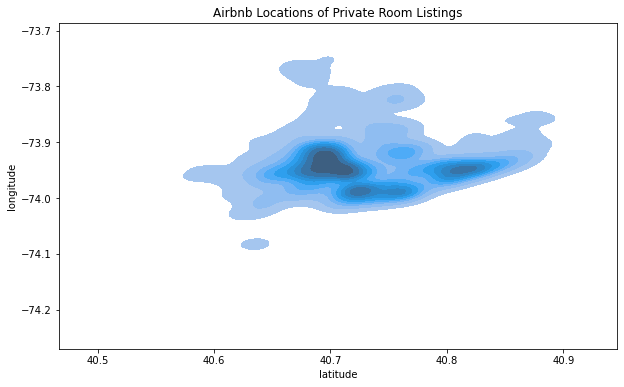

In [64]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=room2, x="latitude", y="longitude", fill=True).set_title("Airbnb Locations of Private Room Listings")

# more entire private rooms are dense in Brooklyn than Manhattan
# there are not as many tall skyscrapers in Brooklyn than Manhattan
# perhaps the buildings in the dense area have similar architecture to be easy to rent out as private rooms

Text(0.5, 1.0, 'Airbnb Locations of Shared Room Listings')

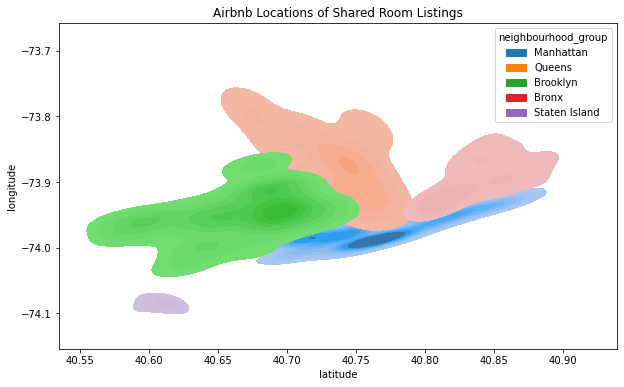

In [65]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=room3, x="latitude", y="longitude", hue="neighbourhood_group", fill=True).set_title("Airbnb Locations of Shared Room Listings")

# shared rooms are desnse in the Manhattan area
# however, the other neighborhood groups have more data points represented on this graph

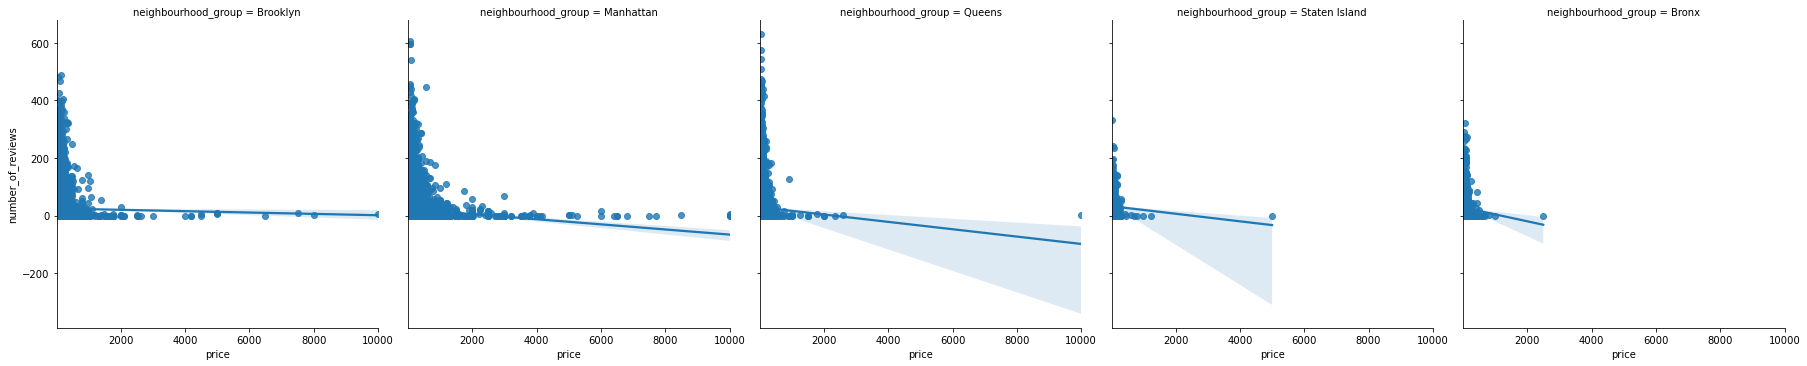

In [66]:
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(x="price", y="number_of_reviews", col="neighbourhood_group", data=df)
# as the price increases, there are less number of reviews
# data is heavily skewed
# regression model might also night be the best to represent this relation because there are many datapoints with low prices